In [1]:
##### Data and libraries

# Common libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import seaborn as sns

# Chapter-specific libraries
import statsmodels.stats.outliers_influence as st_inf # For Cook's distance
import matplotlib.pyplot as plt
import statsmodels.api as sm # For QQ plot

### Generating the data

times = [2,2,3,5,6,9,10,47,61,413]
experience = [11,17,18,1,10,4,6,3,8,0]

data_df = pd.DataFrame(
    {'times': times, 
    'experience': experience})

In [2]:
#  calculating upper and lower confidence intervals for sample mean
lin_mod = ols("times~1", data=data_df).fit()
est = lin_mod.params['Intercept']
se = lin_mod.bse['Intercept']
LL = est-1.96*se
UL = est+1.96*se
print(f'Lower Limit: {LL}\nUpper Limit: {UL}')

Lower Limit: -23.040199740431348
Upper Limit: 134.64019974043134


In [3]:
boot_df = data_df.sample(len(data_df), replace=True) # sampling dataset with replacement
boot_df

,times,experience
4,6,10
2,3,18
7,47,3
0,2,11
7,47,3
7,47,3
9,413,0
9,413,0
7,47,3
9,413,0


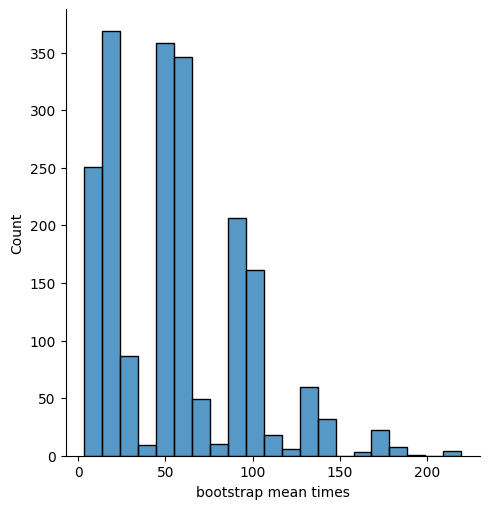

In [4]:
%matplotlib inline
res_boot_sim = []
B = 2000
N = len(data_df)
for i in range(B):
    boot_df = data_df.sample(N, replace=True)
    M = np.mean(boot_df.times)
    res_boot_sim.append(M)

g = sns.displot(res_boot_sim, kind='hist')
g.set_axis_labels('bootstrap mean times')

In [6]:
# constructing CI from bootstrap
# values will vary across resamples as they are randomly generated
LL_b = np.quantile(res_boot_sim, 0.025)
UL_b = np.quantile(res_boot_sim, 0.975)
print(f"Lower Limit Boostrap: {LL_b}\nUpper Limit Bootstrap: {UL_b}")

Lower Limit Boostrap: 6.697500000000001
Upper Limit Bootstrap: 142.50499999999997


In [8]:
# event probability bootstrap
promise_list = []
B = 2000
N = len(data_df)
for i in range(B):
    boot_df = data_df.sample(N, replace=True)
    above180 = len(boot_df[boot_df.times >= 180]) / N
    promise_list.append(above180)

LL_b = np.quantile(promise_list, 0.025)
UL_b = np.quantile(promise_list, 0.975)

print(f"Lower Limit Boostrap: {LL_b}\nUpper Limit Bootstrap: {UL_b}")

Lower Limit Boostrap: 0.0
Upper Limit Bootstrap: 0.3


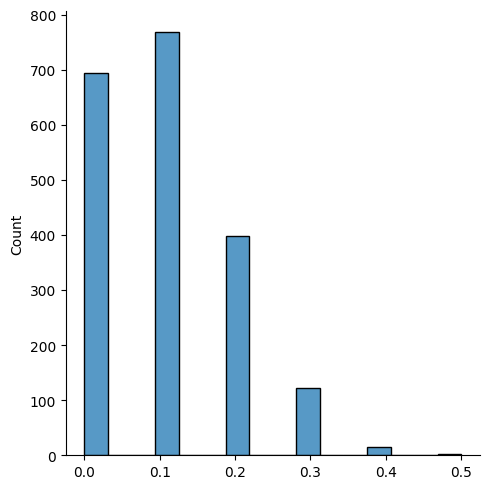

In [9]:
sns.displot(promise_list)

In [11]:
print(ols("times~experience", data=data_df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  times   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     2.427
Date:                Mon, 06 Nov 2023   Prob (F-statistic):              0.158
Time:                        10:27:43   Log-Likelihood:                -60.795
No. Observations:                  10   AIC:                             125.6
Df Residuals:                       8   BIC:                             126.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    132.3891     61.750      2.144      0.0

/home/beastman/anaconda3/envs/bda/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [12]:
# regression with bootstrap
reg_list = []
B = 4000
N = len(data_df)
for i in range(B):
    boot_df = data_df.sample(N, replace=True)
    lin_mod = ols("times~experience", data=boot_df).fit()
    coeff = lin_mod.params['experience']
    reg_list.append(coeff)

LL_b = np.quantile(reg_list, 0.025)
UL_b = np.quantile(reg_list, 0.975)

print(f"Lower Limit Boostrap: {LL_b}\nUpper Limit Bootstrap: {UL_b}")

Lower Limit Boostrap: -29.463960004001386
Upper Limit Bootstrap: -0.160412057815691


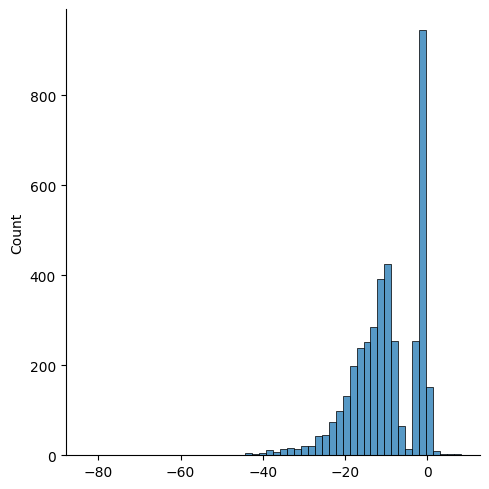

In [13]:
sns.displot(reg_list)

In [14]:
p_val = 2 * sum(1 for x in reg_list if x > 0) / B # proportion of coefficients greater than 0 in the bootstrap sample sets
p_val

0.038